In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data/.DS_Store
/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data/Breast Cancer Wisconsin Dataset.csv
/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data/IRIS.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data='/Users/yongxingnie/Desktop/data science methods and tools/assigment 2/data/IRIS.csv'
df=pd.DataFrame(pd.read_csv(data))

In [4]:
df.shape

(150, 5)

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
feature_columns = ['sepal_length', 'sepal_width', 'petal_length','petal_width']
X = df[feature_columns].values
X=df.drop(['species'], axis=1)
y = df['species'].values

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


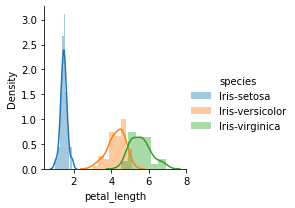

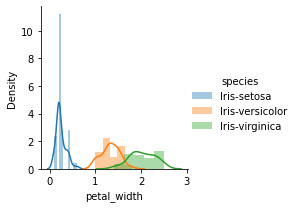

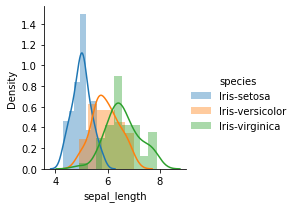

In [11]:
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(df,hue="species",size=3).map(sns.distplot,"sepal_length").add_legend()
plt.show()

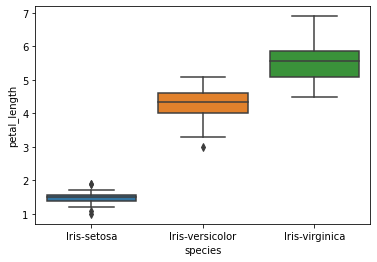

In [12]:
sns.boxplot(x="species",y="petal_length",data=df)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=108)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [14]:
from sklearn.tree import DecisionTreeClassifier
DT_default = DecisionTreeClassifier(max_depth=5)
model_DT = DT_default.fit(X_train,y_train)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred_test_default = model_DT.predict(X_test)
print(classification_report(y_test,y_pred_test_default))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.64      0.78        11
           2       0.50      1.00      0.67         4

    accuracy                           0.87        30
   macro avg       0.83      0.88      0.81        30
weighted avg       0.93      0.87      0.87        30



In [16]:
print(f' Confusion_Matrix: \n {confusion_matrix(y_test,y_pred_test_default)}','\n')
print(f' Accuracy_Score:\n {accuracy_score(y_test,y_pred_test_default)}')

 Confusion_Matrix: 
 [[15  0  0]
 [ 0  7  4]
 [ 0  0  4]] 

 Accuracy_Score:
 0.8666666666666667


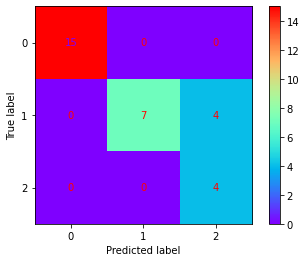

In [17]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_DT,X_test,y_test,cmap='rainbow')

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import export_text

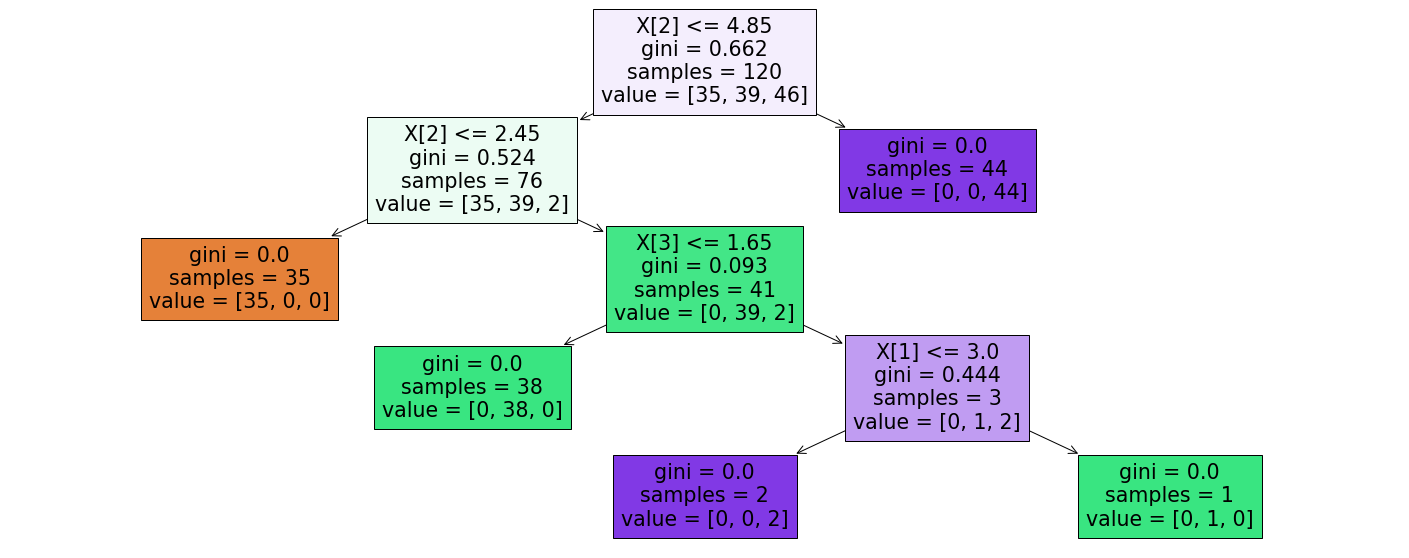

In [19]:
plt.figure(figsize=(25,10))
plot_tree(model_DT,filled=True)
plt.show()

In [20]:
text_representation = export_text(model_DT)
print(text_representation)

|--- feature_2 <= 4.85
|   |--- feature_2 <= 2.45
|   |   |--- class: 0
|   |--- feature_2 >  2.45
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.00
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.00
|   |   |   |   |--- class: 1
|--- feature_2 >  4.85
|   |--- class: 2



In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [22]:
%%time
n_folds = 10
parameters = {'max_depth':range(1,20)}
dtree = DecisionTreeClassifier(criterion='gini',random_state=108)
GScv = GridSearchCV(estimator=dtree,param_grid=parameters,cv=n_folds,scoring='accuracy',return_train_score=True)
GScv.fit(X_train,y_train)

CPU times: user 596 ms, sys: 4.62 ms, total: 600 ms
Wall time: 599 ms


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=108),
             param_grid={'max_depth': range(1, 20)}, return_train_score=True,
             scoring='accuracy')

In [23]:
scores_GScv = GScv.cv_results_
scores_GScv_df = pd.DataFrame(scores_GScv)
scores_GScv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001683,0.000307,0.001086,0.000217,1,{'max_depth': 1},0.666667,0.666667,0.666667,0.583333,...,0.694444,0.703704,0.694444,0.685185,0.685185,0.685185,0.694444,0.685185,0.691667,0.005929
1,0.001256,0.000040,0.000789,0.000031,2,{'max_depth': 2},1.000000,1.000000,1.000000,0.916667,...,0.981481,0.990741,0.981481,0.981481,0.981481,0.981481,0.990741,0.981481,0.983333,0.003704
2,0.001283,0.000056,0.000794,0.000063,3,{'max_depth': 3},1.000000,1.000000,1.000000,0.916667,...,0.990741,0.990741,1.000000,0.990741,0.990741,0.990741,0.990741,0.990741,0.991667,0.002778
3,0.001294,0.000042,0.000815,0.000068,4,{'max_depth': 4},1.000000,1.000000,1.000000,0.916667,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.001251,0.000051,0.000765,0.000014,5,{'max_depth': 5},1.000000,1.000000,1.000000,0.916667,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


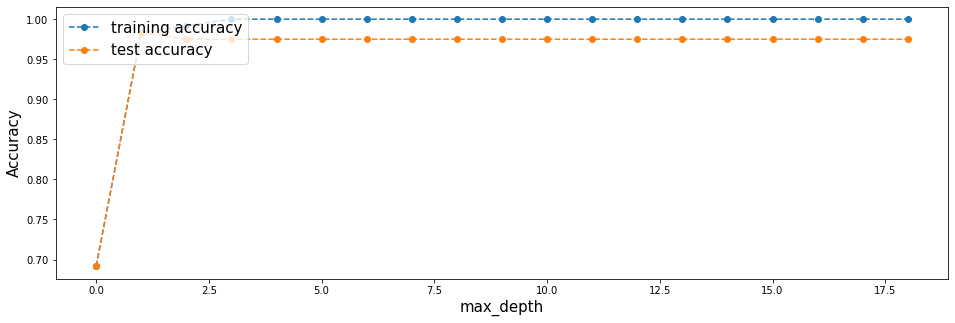

In [24]:
plt.figure(figsize=(16,5))

plt.plot(scores_GScv_df['mean_train_score'],label="training accuracy",marker='o',linestyle='dashed')
plt.plot(scores_GScv_df['mean_test_score'],label="test accuracy",marker='o',linestyle='dashed')

plt.legend(loc="upper left", prop={'size':15})
plt.xlabel("max_depth", size=15) 
plt.ylabel("Accuracy", size=15)

plt.show()

In [25]:
DT_default = DecisionTreeClassifier(max_depth=4)
model_DT = DT_default.fit(X_train,y_train)
y_pred_test_default = model_DT.predict(X_test)
print(classification_report(y_test,y_pred_test_default))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.64      0.78        11
           2       0.50      1.00      0.67         4

    accuracy                           0.87        30
   macro avg       0.83      0.88      0.81        30
weighted avg       0.93      0.87      0.87        30



In [26]:
print(f' Confusion_Matrix: \n {confusion_matrix(y_test,y_pred_test_default)}','\n')
print(f' Accuracy_Score:\n {accuracy_score(y_test,y_pred_test_default)}')

 Confusion_Matrix: 
 [[15  0  0]
 [ 0  7  4]
 [ 0  0  4]] 

 Accuracy_Score:
 0.8666666666666667


In [27]:
%%time
n_folds = 10
parameters = {'min_samples_leaf':range(1,10,1)}
dtree = DecisionTreeClassifier(criterion='gini',random_state=108)
GScv = GridSearchCV(estimator=dtree,param_grid=parameters,scoring='accuracy',cv=n_folds,return_train_score=True)
GScv.fit(X_train,y_train)

CPU times: user 294 ms, sys: 3.49 ms, total: 297 ms
Wall time: 296 ms


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=108),
             param_grid={'min_samples_leaf': range(1, 10)},
             return_train_score=True, scoring='accuracy')

In [28]:
scores_GScv = GScv.cv_results_
scores_GScv_df = pd.DataFrame(scores_GScv)
scores_GScv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001950,0.000662,0.000986,0.000310,1,{'min_samples_leaf': 1},1.0,1.0,1.0,0.916667,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.001348,0.000074,0.000783,0.000030,2,{'min_samples_leaf': 2},1.0,1.0,1.0,0.916667,...,0.990741,0.990741,1.000000,0.990741,0.990741,0.990741,0.990741,0.990741,0.991667,0.002778
2,0.001238,0.000027,0.000765,0.000020,3,{'min_samples_leaf': 3},1.0,1.0,1.0,0.916667,...,0.990741,0.990741,0.981481,0.990741,0.990741,0.990741,0.990741,0.990741,0.989815,0.002778
3,0.001300,0.000177,0.000734,0.000034,4,{'min_samples_leaf': 4},1.0,1.0,1.0,0.916667,...,0.981481,0.990741,0.981481,0.981481,0.981481,0.981481,0.990741,0.981481,0.983333,0.003704
4,0.001241,0.000088,0.000859,0.000334,5,{'min_samples_leaf': 5},1.0,1.0,1.0,0.916667,...,0.981481,0.990741,0.981481,0.981481,0.981481,0.981481,0.990741,0.981481,0.983333,0.003704


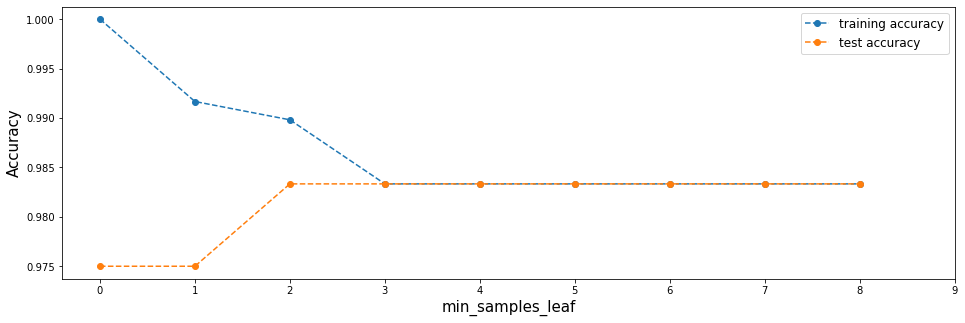

In [29]:
plt.figure(figsize=(16,5))

plt.plot(scores_GScv_df['mean_train_score'],label="training accuracy",marker='o',linestyle='dashed')
plt.plot(scores_GScv_df['mean_test_score'],label="test accuracy",marker='o',linestyle='dashed')

plt.legend(loc="best", prop={'size':12}) # loc = best,upper right,upper left,lower left,lower right,right,center left,center right,lower center,upper center,center
plt.xlabel("min_samples_leaf", size=15) 
plt.ylabel("Accuracy", size=15)
plt.xticks(range(0,10,1))

plt.show()

In [30]:
%%time
n_folds = 10
parameters = {"min_samples_split":range(1,20,1)}
dtree = DecisionTreeClassifier(criterion='gini',random_state=108)
GScv = GridSearchCV(dtree,parameters,cv=n_folds,scoring='accuracy',return_train_score=True)
GScv.fit(X_train,y_train)

CPU times: user 576 ms, sys: 5.38 ms, total: 581 ms
Wall time: 584 ms


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=108),
             param_grid={'min_samples_split': range(1, 20)},
             return_train_score=True, scoring='accuracy')

In [31]:
scores_GScv = GScv.cv_results_
scores_GScv_df = pd.DataFrame(scores_GScv)
scores_GScv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001649,0.000384,0.000000,0.000000,1,{'min_samples_split': 1},NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.001365,0.000129,0.000796,0.000046,2,{'min_samples_split': 2},1.0,1.0,1.0,0.916667,...,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.001283,0.000059,0.000778,0.000049,3,{'min_samples_split': 3},1.0,1.0,1.0,0.916667,...,1.000000,0.990741,1.0,1.000000,1.000000,1.000000,0.990741,1.000000,0.998148,0.003704
3,0.001266,0.000065,0.000777,0.000022,4,{'min_samples_split': 4},1.0,1.0,1.0,0.916667,...,0.990741,0.990741,1.0,0.990741,0.990741,0.990741,0.990741,0.990741,0.991667,0.002778
4,0.001438,0.000211,0.000800,0.000091,5,{'min_samples_split': 5},1.0,1.0,1.0,0.916667,...,0.990741,0.990741,1.0,0.990741,0.990741,0.990741,0.990741,0.990741,0.991667,0.002778


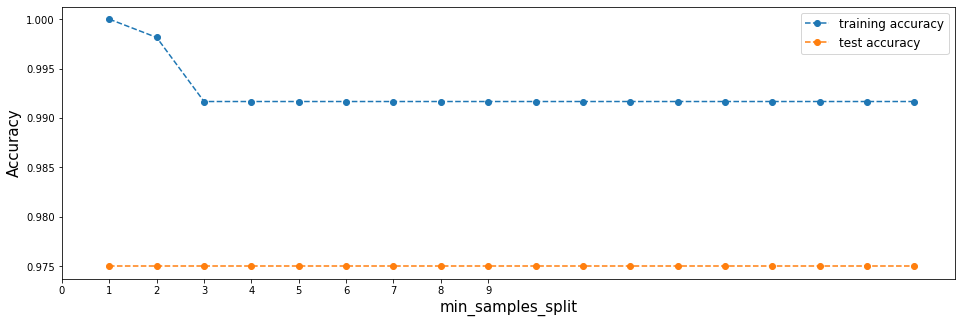

In [32]:
plt.figure(figsize=(16,5))

plt.plot(scores_GScv_df['mean_train_score'],label="training accuracy",marker='o',linestyle='dashed')
plt.plot(scores_GScv_df['mean_test_score'],label="test accuracy",marker='o',linestyle='dashed')

plt.legend(loc="best", prop={'size':12}) # loc = best,upper right,upper left,lower left,lower right,right,center left,center right,lower center,upper center,center
plt.xlabel("min_samples_split",size=15) 
plt.ylabel("Accuracy",size=15)
plt.xticks(range(0,10,1))

plt.show()

In [33]:
%%time
param_grid = {
    'max_depth': range(1,5,1),
    'min_samples_leaf': range(1,5,1),
    'min_samples_split': range(1,5,1),
    'criterion': ["entropy","gini"]}
n_folds = 10
dtree = DecisionTreeClassifier(random_state=108)
grid_search = GridSearchCV(estimator=dtree,param_grid=param_grid,cv=n_folds,verbose=1)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
CPU times: user 2.69 s, sys: 29.1 ms, total: 2.72 s
Wall time: 2.72 s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=108),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 5),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 5)},
             verbose=1)

In [34]:
cv_results = grid_search.cv_results_
pd.DataFrame(cv_results).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001796,0.000386,0.000000,0.000000,entropy,1,1,1,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128
1,0.001349,0.000194,0.000794,0.000035,entropy,1,1,2,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.75,...,0.583333,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.037268,85
2,0.001374,0.000193,0.000850,0.000076,entropy,1,1,3,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.75,...,0.583333,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.037268,85
3,0.001449,0.000340,0.000898,0.000157,entropy,1,1,4,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.75,...,0.583333,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.037268,85
4,0.001150,0.000069,0.000000,0.000000,entropy,1,2,1,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101


In [35]:
print(f' Best Accuracy you can get:\n {grid_search.best_score_}\n','***'*15)
print(f' Best Hyperparameters Parameters & there Values: \n{grid_search.best_params_}')

 Best Accuracy you can get:
 0.9833333333333332
 *********************************************
 Best Hyperparameters Parameters & there Values: 
{'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [36]:
dt_with_optimal_hyperparameters = DecisionTreeClassifier(criterion='entropy',max_depth=2,min_samples_leaf=1,min_samples_split=2,random_state=108)
model_dt = dt_with_optimal_hyperparameters.fit(X_train,y_train)
model_dt

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=108)

In [37]:
from sklearn import metrics
y_pred_test = model_dt.predict(X_test)
metrics.accuracy_score(y_test,y_pred_test)

0.8333333333333334

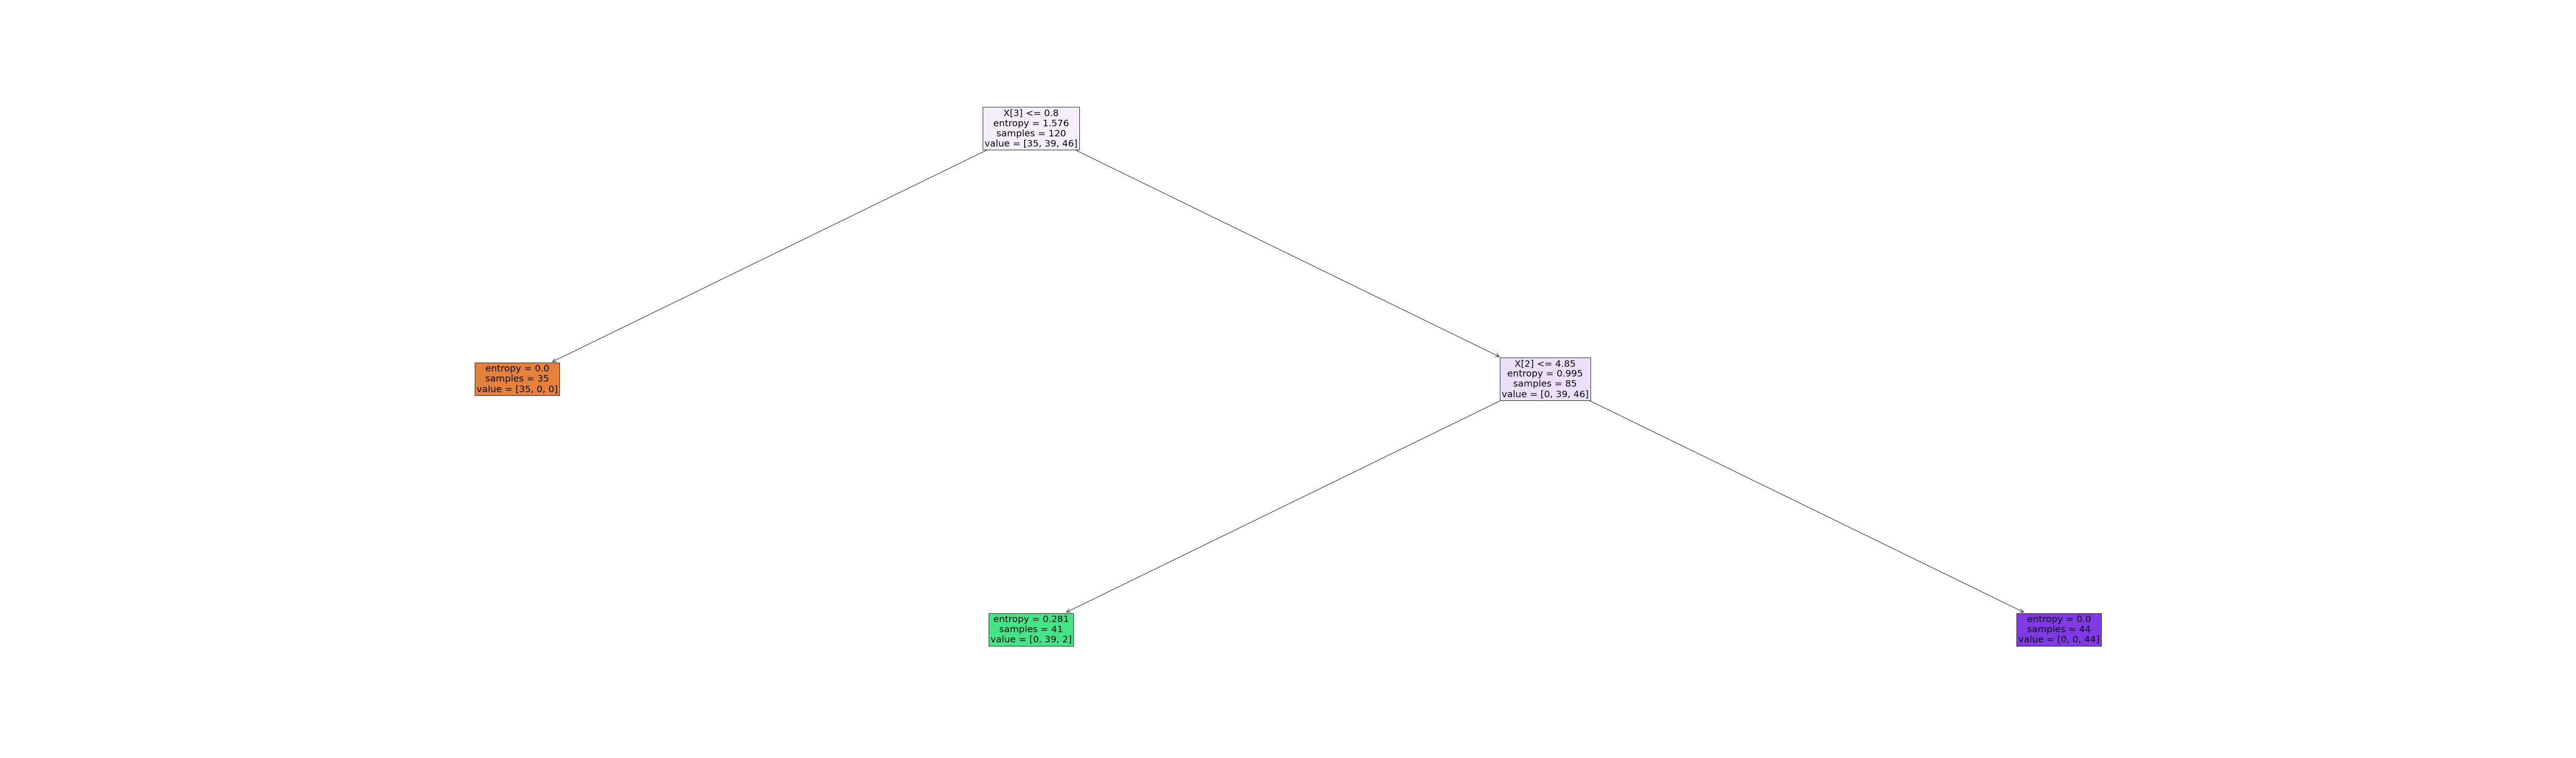

In [38]:
fig = plt.figure(figsize=(100,30))
plot_tree(model_dt,filled=True,fontsize=20)
plt.show()

In [39]:
print(export_text(model_dt))

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.85
|   |   |--- class: 1
|   |--- feature_2 >  4.85
|   |   |--- class: 2



In [40]:
print(metrics.classification_report(y_test,y_pred_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.64      0.74        11
           2       0.43      0.75      0.55         4

    accuracy                           0.83        30
   macro avg       0.77      0.80      0.76        30
weighted avg       0.88      0.83      0.84        30



[[15  0  0]
 [ 0  7  4]
 [ 0  1  3]] 
 ******************************


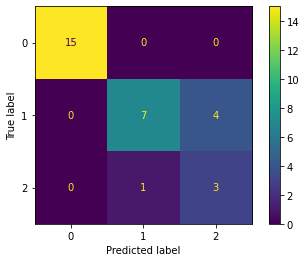

In [41]:
print(metrics.confusion_matrix(y_test,y_pred_test),'\n','***'*10)
plot_confusion_matrix(model_dt,X_test,y_test)
plt.show()

In [42]:
model_dt

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=108)

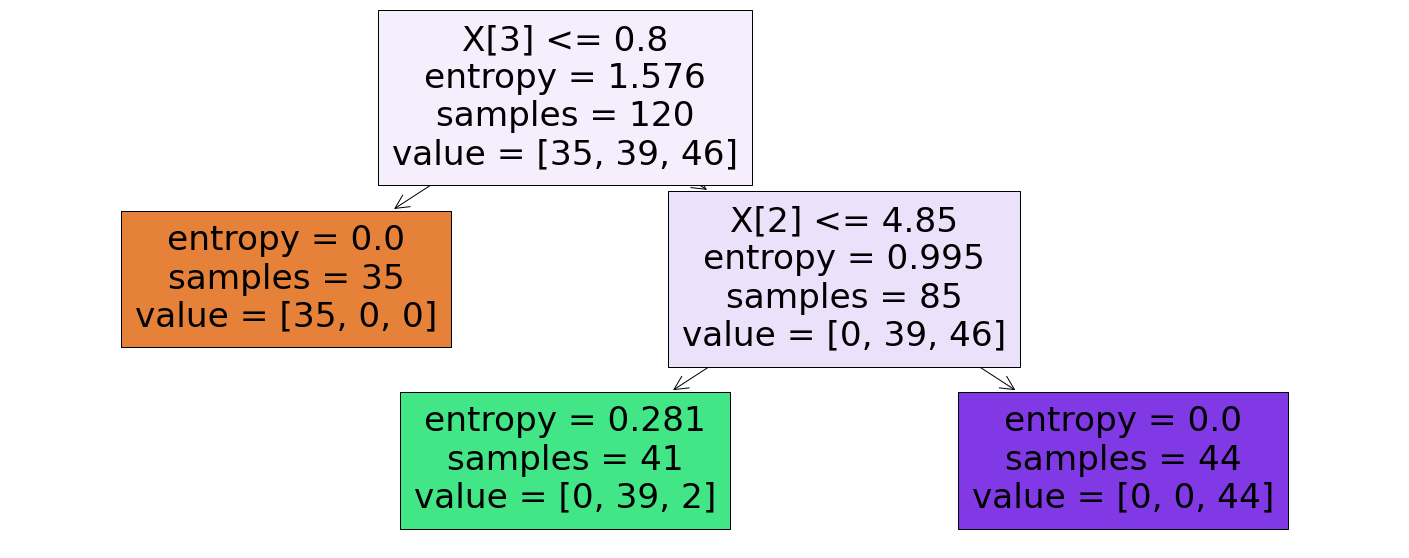

In [44]:
plt.figure(figsize=(25,10))

plot_tree(model_dt,filled=True)

plt.show()